In [ ]:
from google.colab import drive
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/rasio 2023 2

/content/gdrive/MyDrive/rasio 2023 2


In [ ]:
%ls

'Capital Stock 2.csv'
'central africa data.xlsx'
'Democratic Korea (1).gsheet'
'Democratic Korea.gsheet'
'Development Flows to Agriculture.gsheet'
'Foreign Direct Investment (FDI).gsheet'
'Government Expenditure.gsheet'
'Macro Indicators 2 (1).gsheet'
'Macro Indicators 2.csv'
'Macro Indicators 2.gsheet'
'Macro Indicators fixx.xlsx'
'Madagascar Data.gsheet'
 Rasio_2023_gg.xlsx
'SDG Indicators 2 (1).gsheet'
'SDG Indicators 2 (2).gsheet'
'SDG Indicators 2.csv'
'SDG Indicators 2.gsheet'
'Suite of Food Security Indicators.gsheet'


# Data Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Preparing Dataset
df = pd.read_excel('central africa data.xlsx')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Year,Undernourishment (y),Average dietary energy supply adequacy,Average protein supply,Average supply of protein of animal origin,Percentage of children under 5 years of age who are stunted,Per capita food supply variability,Value of food imports in total merchandise exports,Percentage of population using safely managed drinking water services,Percentage of population using safely managed sanitation services,Agriculture share of Government Expenditure,Gross Domestic Product,Gross Fixed Capital Formation,Gross National Income,"Value Added (Agriculture, Forestry and Fishing)",Total FDI inflows,Food and nutrition assistance (distibuttor),Agriculture (Central Government),"Value Added (Agriculture, Forestry and Fishing).1",Average dietary energy requirement (kcal/cap/day),Water Use Efficiency (Industries),Water Use Efficiency (No breakdown)
0,2012,37.4,92,51.3,19.0,40.6,41,33.0,7.0,16.4,6.48,2510.270091,270.346061,2521.492288,924.135010,70.035157,24.533635,18.90,924.135010,2127,57.64,20.55
1,2013,42.1,89,49.3,19.3,40.6,41,45.0,6.9,16.1,1.46,1691.064342,107.380061,1706.225000,545.518464,1.852793,25.189304,22.52,545.518464,2120,31.66,14.56
2,2014,46.9,86,47.7,19.7,40.8,63,62.0,6.8,15.7,9.09,1892.292182,400.331743,1911.969476,643.106923,3.475008,76.141062,22.03,643.106923,2112,25.56,13.94
3,2015,49.1,84,48.0,20.0,40.9,70,74.0,6.7,15.3,13.19,1694.542946,348.614840,1715.581522,534.244189,3.000000,68.867374,18.96,534.244189,2106,30.25,15.28
4,2016,48.0,85,49.4,20.0,40.9,82,66.0,6.6,15.0,3.19,1825.018853,381.020554,1847.782484,582.527337,7.256090,81.994118,5.04,582.527337,2108,31.11,15.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 22 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Year                                                                    10 non-null     float64
 1   Undernourishment (y)                                                    10 non-null     float64
 2   Average dietary energy supply adequacy                                  10 non-null     float64
 3   Average protein supply                                                  10 non-null     float64
 4   Average supply of protein of animal origin                              10 non-null     float64
 5   Percentage of children under 5 years of age who are stunted             10 non-null     float64
 6   Per capita food supply variability                                      10 non-null 

In [ ]:
df.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [ ]:
df.isna().sum()

Year                                                                      0
Undernourishment (y)                                                      0
Average dietary energy supply adequacy                                    0
Average protein supply                                                    0
Average supply of protein of animal origin                                0
Percentage of children under 5 years of age who are stunted               0
Per capita food supply variability                                        0
Value of food imports in total merchandise exports                        0
Percentage of population using safely managed drinking water services     0
Percentage of population using safely managed sanitation services         0
Agriculture share of Government Expenditure                               0
Gross Domestic Product                                                    0
Gross Fixed Capital Formation                                             0
Gross Nation

In [ ]:
df['Value of food imports in total merchandise exports'] = df['Value of food imports in total merchandise exports'].fillna(df['Value of food imports in total merchandise exports'].mean())
df['Water Use Efficiency (Industries)'] = df['Water Use Efficiency (Industries)'].fillna(df['Water Use Efficiency (Industries)'].mean())
df['Water Use Efficiency (No breakdown)'] = df['Water Use Efficiency (No breakdown)'].fillna(df['Water Use Efficiency (No breakdown)'].mean())

In [ ]:
# Normalisasi Decimal Scaling
max_value = np.max(np.abs(df))
normalized_data = df / (10 ** np.ceil(np.log10(max_value)))

print(normalized_data)

     Year  Undernourishment (y)  Average dietary energy supply adequacy  \
0  0.2012                 0.374                                    0.92   
1  0.2013                 0.421                                    0.89   
2  0.2014                 0.469                                    0.86   
3  0.2015                 0.491                                    0.84   
4  0.2016                 0.480                                    0.85   
5  0.2017                 0.467                                    0.86   
6  0.2018                 0.445                                    0.87   
7  0.2019                 0.448                                    0.87   
8  0.2020                 0.457                                    0.86   
9  0.2021                 0.487                                    0.84   

   Average protein supply   Average supply of protein of animal origin  \
0                 0.513000                                    0.190000   
1                 0.493000

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
import numpy as np

# Normalisasi Z-Score
normalized_data = (df - np.mean(df)) / np.std(df)

print(normalized_data)

       Year  Undernourishment (y)  Average dietary energy supply adequacy  \
0 -1.566699             -2.393578                                2.359001   
1 -1.218544             -0.985591                                1.048445   
2 -0.870388              0.452353                               -0.262111   
3 -0.522233              1.111411                               -1.135815   
4 -0.174078              0.781882                               -0.698963   
5  0.174078              0.392439                               -0.262111   
6  0.522233             -0.266619                                0.174741   
7  0.870388             -0.176747                                0.174741   
8  1.218544              0.092867                               -0.262111   
9  1.566699              0.991583                               -1.135815   

   Average protein supply   Average supply of protein of animal origin  \
0                 1.629442                                   -2.139317   
1   

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Kolom-kolom yang ingin dinormalisasi (kecuali kolom "Usia")
columns_to_normalize = df.drop(columns='Year')

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom yang dipilih
for col in columns_to_normalize:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

print(df)

   Year  Undernourishment (y)  Average dietary energy supply adequacy  \
0  2012              0.000000                                   1.000   
1  2013              0.401709                                   0.625   
2  2014              0.811966                                   0.250   
3  2015              1.000000                                   0.000   
4  2016              0.905983                                   0.125   
5  2017              0.794872                                   0.250   
6  2018              0.606838                                   0.375   
7  2019              0.632479                                   0.375   
8  2020              0.709402                                   0.250   
9  2021              0.965812                                   0.000   

   Average protein supply   Average supply of protein of animal origin  \
0                 1.000000                                    0.000000   
1                 0.444444                      

In [ ]:
df = pd.DataFrame(normalized_data)
df.head()

,Year,Undernourishment (y),Average dietary energy supply adequacy,Average protein supply,Average supply of protein of animal origin,Percentage of children under 5 years of age who are stunted,Per capita food supply variability,Value of food imports in total merchandise exports,Percentage of population using safely managed drinking water services,Percentage of population using safely managed sanitation services,Agriculture share of Government Expenditure,Gross Domestic Product,Gross Fixed Capital Formation,Gross National Income,"Value Added (Agriculture, Forestry and Fishing)",Total FDI inflows,Food and nutrition assistance (distibuttor),Agriculture (Central Government),"Value Added (Agriculture, Forestry and Fishing).1",Average dietary energy requirement (kcal/cap/day),Water Use Efficiency (Industries),Water Use Efficiency (No breakdown)
0,0.2012,0.374,0.92,0.513,0.190,0.406,0.41,0.33,0.70,0.164,0.0648,0.251027,0.270346,0.252149,0.924135,0.700352,0.024534,0.1890,0.924135,0.2127,0.5764,0.2055
1,0.2013,0.421,0.89,0.493,0.193,0.406,0.41,0.45,0.69,0.161,0.0146,0.169106,0.107380,0.170622,0.545518,0.018528,0.025189,0.2252,0.545518,0.2120,0.3166,0.1456
2,0.2014,0.469,0.86,0.477,0.197,0.408,0.63,0.62,0.68,0.157,0.0909,0.189229,0.400332,0.191197,0.643107,0.034750,0.076141,0.2203,0.643107,0.2112,0.2556,0.1394
3,0.2015,0.491,0.84,0.480,0.200,0.409,0.70,0.74,0.67,0.153,0.1319,0.169454,0.348615,0.171558,0.534244,0.030000,0.068867,0.1896,0.534244,0.2106,0.3025,0.1528
4,0.2016,0.480,0.85,0.494,0.200,0.409,0.82,0.66,0.66,0.150,0.0319,0.182502,0.381021,0.184778,0.582527,0.072561,0.081994,0.0504,0.582527,0.2108,0.3111,0.1577


In [ ]:
pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=40527b3757b801ae222727d412337103b0d52575c1ac6fff554031c6dc2be5cf
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

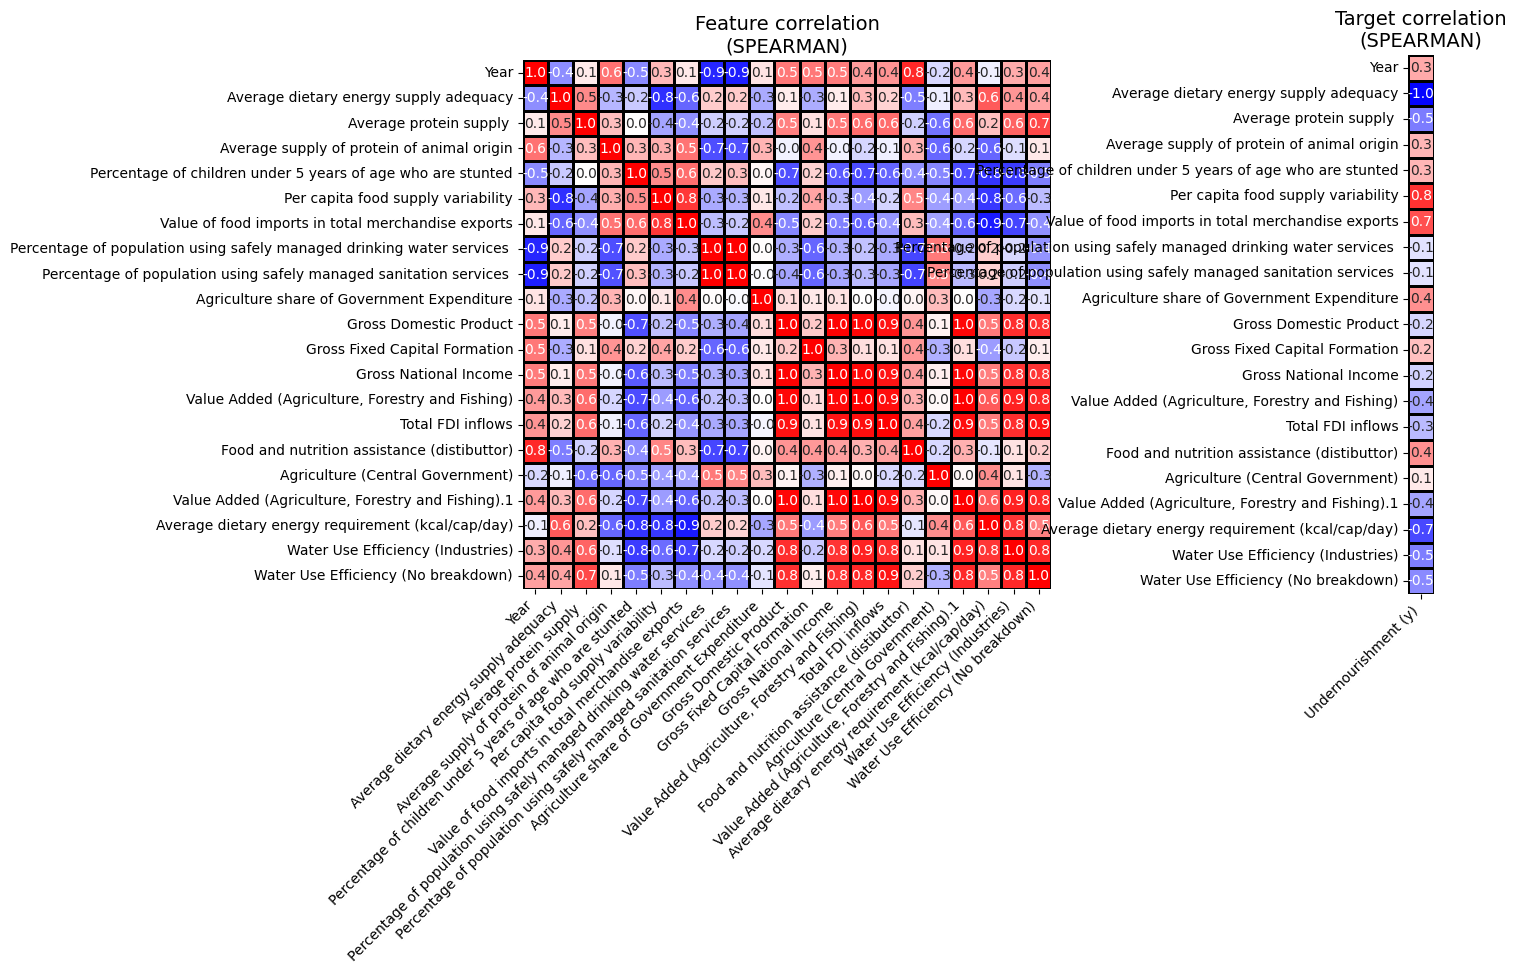

In [ ]:
from jcopml.plot import plot_correlation_matrix
plot_correlation_matrix(df, 'Undernourishment (y)', numeric_col='auto')

In [ ]:
df.to_excel('central africa data norm.xlsx', index=False)

In [ ]:
df = pd.DataFrame(df)
df

,Year,Undernourishment (y),21010 (X1),21012 (X2),21013 (X3),21014 (X4),21025 (X5),21026 (X6),21031 (X7),21032 (X8),21033 (X9),210401 (X10),21045 (X11),21046 (X12),21059 (X13),AG_XPD_AGSGB (X14),ER_H2O_WUEYST_AGR (X15),22008 (X16),22015 (X17),22011 (X18),22016 (X19),22075 (X20)
0,2012,0.000000,1.000,1.0000,1.000000,0.000000,0.666667,1.0000,0.000000,0.934066,0.000000,0.0,1.000,1.000000,0.0,0.427962,1.000000,0.773694,0.129269,0.706809,0.713542,1.000000
1,2013,0.401709,0.625,0.7500,0.444444,0.230769,0.666667,0.4875,0.000000,0.604396,0.292683,0.0,0.875,0.892857,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2014,0.811966,0.250,0.7500,0.000000,0.538462,0.888889,0.4000,0.536585,0.000000,0.707317,0.0,0.750,0.750000,1.0,0.650469,0.111111,0.964215,1.000000,0.884282,1.000000,0.526135
3,2015,1.000000,0.000,0.7500,0.083333,0.769231,1.000000,0.4875,0.707317,0.879121,1.000000,0.0,0.625,0.607143,1.0,1.000000,0.111111,0.480313,0.142186,0.439464,0.408471,0.666011
4,2016,0.905983,0.125,0.5000,0.472222,0.769231,1.000000,0.4875,1.000000,1.000000,0.804878,1.0,0.500,0.500000,1.0,0.147485,0.111111,0.873286,0.208876,0.797578,0.849616,0.742437
5,2017,0.794872,0.250,0.2500,0.833333,0.769231,1.000000,0.4875,0.585366,0.758242,0.609756,1.0,0.375,0.357143,1.0,0.410060,0.222222,1.000000,0.276525,1.000000,0.978974,0.766925
6,2018,0.606838,0.375,0.0000,0.833333,1.000000,0.888889,0.5500,0.073171,0.571429,0.609756,1.0,0.250,0.250000,1.0,0.443308,0.222222,0.861858,0.212807,0.835060,0.731912,0.730573
7,2019,0.632479,0.375,0.0000,0.523810,1.000000,0.555556,0.0000,0.317073,0.615385,0.682927,0.0,0.125,0.107143,1.0,0.577153,0.333333,0.706847,0.056778,0.643433,0.736646,0.692513
8,2020,0.709402,0.250,0.5000,0.455782,0.634615,0.333333,0.4875,0.658537,0.516484,0.609756,0.0,0.000,0.000000,1.0,0.377664,0.333333,0.808020,0.285528,0.701970,0.776867,0.696021
9,2021,0.965812,0.000,0.4375,0.457402,0.713942,0.000000,0.4875,0.341463,0.659341,0.590786,0.0,0.500,0.496032,1.0,0.447570,0.271605,0.885708,0.151368,0.834071,0.821590,0.776422


In [ ]:
pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=60f9d2689b1ac22d2a0682cdcfd9a819ee764400d67088dcf00408259e07ee6f
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

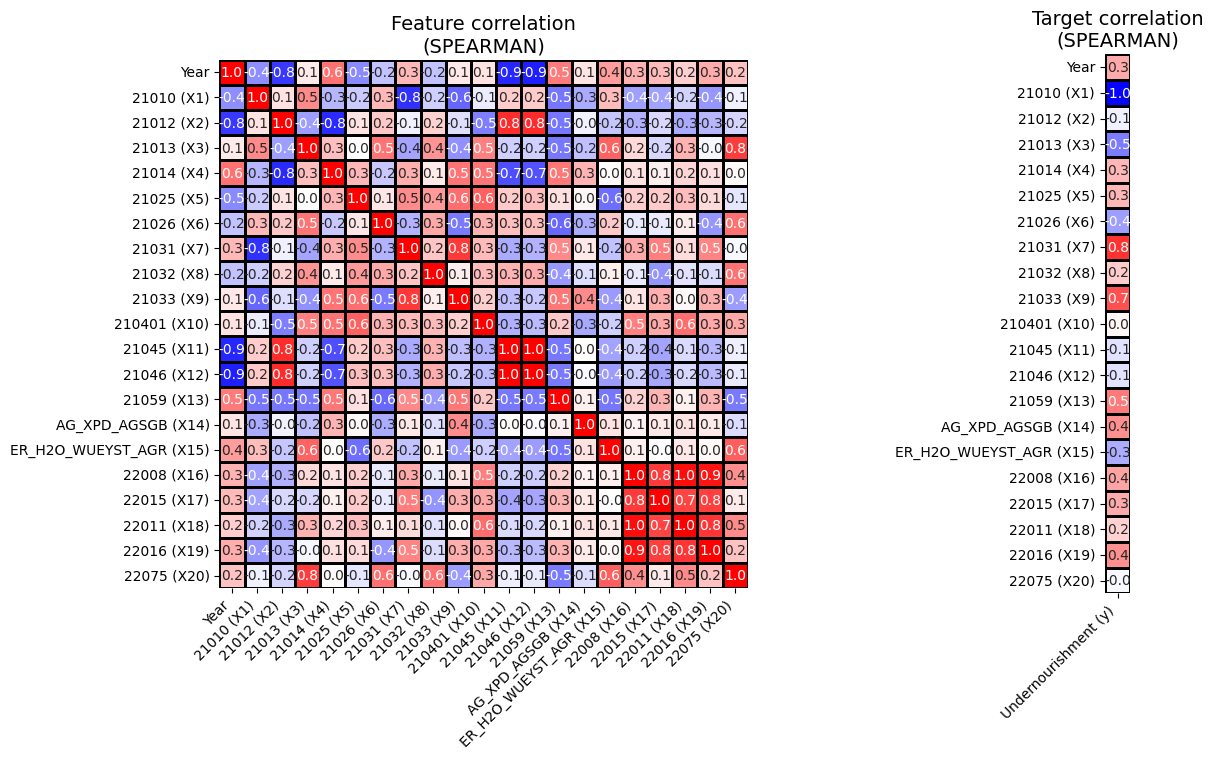

In [ ]:
from jcopml.plot import plot_correlation_matrix
plot_correlation_matrix(df, 'Undernourishment (y)', numeric_col='auto')

In [ ]:
df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
       'Element', 'Year Code', 'Unit', 'Flag', 'Note'], axis=1, inplace=True)

In [ ]:
df.head()

,Area,Item Code,Item,Year,Value,Flag Description
0,Afghanistan,21026,Percentage of children under 5 years affected ...,2004,9.1,Figure from international organizations
1,Afghanistan,21026,Percentage of children under 5 years affected ...,2013,9.5,Figure from international organizations
2,Afghanistan,21026,Percentage of children under 5 years affected ...,2018,5.1,Figure from international organizations
3,Afghanistan,21026,Percentage of children under 5 years affected ...,2022,5.1,Figure from international organizations
4,Albania,21026,Percentage of children under 5 years affected ...,2005,7.3,Figure from international organizations


In [ ]:
df.Year.value_counts()

2014         1021
2012         1015
2018         1014
2019         1010
2011         1007
2016         1007
2015         1004
2013         1003
2017         1001
2020          989
2021          748
2016-2018     612
2017-2019     612
2014-2016     612
2018-2020     612
2019-2021     612
2015-2017     612
2020-2022     612
2022          468
2000           57
2006           43
2010           41
2005           33
2007           31
2004           31
2009           30
2008           27
2003           24
2002           24
2001           21
Name: Year, dtype: int64

In [ ]:
# Daftar nilai yang ingin dihapus dari kolom
nilai_hapus = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']

# Menghapus nilai yang ada dalam daftar dari kolom tertentu
df = df[~df['Year'].isin(nilai_hapus)]

# Menampilkan DataFrame setelah menghapus nilai
print(df)

              Area Item Code  \
1      Afghanistan     21026   
2      Afghanistan     21026   
3      Afghanistan     21026   
6          Albania     21026   
7          Albania     21026   
...            ...       ...   
15928     Zimbabwe   210401F   
15929     Zimbabwe   210401F   
15930     Zimbabwe   210401F   
15931     Zimbabwe   210401F   
15932     Zimbabwe   210401F   

                                                    Item       Year Value  \
1      Percentage of children under 5 years affected ...       2013   9.5   
2      Percentage of children under 5 years affected ...       2018   5.1   
3      Percentage of children under 5 years affected ...       2022   5.1   
6      Percentage of children under 5 years affected ...       2017   1.6   
7      Percentage of children under 5 years affected ...       2022   1.6   
...                                                  ...        ...   ...   
15928  Prevalence of severe food insecurity in the fe...  2016-2018  37.1   

In [ ]:
# Menghapus baris dengan kondisi pada kolom 'Tahun'
tahun_hapus = ['2000-2002', '2001-2003', '2002-2004', '2003-2005',
               '2004-2006', '2005-2007', '2006-2008', '2007-2009',
               '2008-2010', '2009-2010', '2010-2011']

for range_year in tahun_hapus:
    start, end = range_year.split('-')
    start = int(start)
    end = int(end)
    df = df[~((df['Year'] >= str(start)) & (df['Year'] <= str(end)))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12969 entries, 1 to 15932
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              12969 non-null  object
 1   Item Code         12969 non-null  object
 2   Item              12969 non-null  object
 3   Year              12969 non-null  object
 4   Value             12969 non-null  object
 5   Flag Description  12969 non-null  object
dtypes: object(6)
memory usage: 709.2+ KB


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 11 to 3373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    1451 non-null   object 
 1   Year    1451 non-null   object 
 2   Value   1451 non-null   float64
dtypes: float64(1), object(2)
memory usage: 45.3+ KB


In [ ]:
import pandas as pd

# Mengubah semua nilai menjadi 1.0
df['2012'] = df['2012'].replace('<2.5', 2.0)
df['2013'] = df['2013'].replace('<2.5', 2.0)
df['2014'] = df['2014'].replace('<2.5', 2.0)
df['2015'] = df['2015'].replace('<2.5', 2.0)
df['2015'] = df['2015'].replace('<2.5', 2.0)
df['2016'] = df['2016'].replace('<2.5', 2.0)
df['2017'] = df['2017'].replace('<2.5', 2.0)
df['2018'] = df['2018'].replace('<2.5', 2.0)
df['2019'] = df['2019'].replace('<2.5', 2.0)
df['2020'] = df['2020'].replace('<2.5', 2.0)
df['2021'] = df['2021'].replace('<2.5', 2.0)

In [ ]:
# Mengubah tipe data kolom menjadi float
df['2012'] = df['2012'].astype(float)
df['2013'] = df['2013'].astype(float)
df['2014'] = df['2014'].astype(float)
df['2015'] = df['2015'].astype(float)
df['2016'] = df['2016'].astype(float)
df['2017'] = df['2017'].astype(float)
df['2018'] = df['2018'].astype(float)
df['2019'] = df['2019'].astype(float)
df['2020'] = df['2020'].astype(float)
df['2021'] = df['2021'].astype(float)

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

GeoAreaName    0
2012           0
2013           0
2014           0
2015           0
2016           0
2017           0
2018           0
2019           0
2020           0
2021           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 143
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaName  140 non-null    object 
 1   2012         140 non-null    float64
 2   2013         140 non-null    float64
 3   2014         140 non-null    float64
 4   2015         140 non-null    float64
 5   2016         140 non-null    float64
 6   2017         140 non-null    float64
 7   2018         140 non-null    float64
 8   2019         140 non-null    float64
 9   2020         140 non-null    float64
 10  2021         140 non-null    float64
dtypes: float64(10), object(1)
memory usage: 13.1+ KB


In [ ]:
df.Year.value_counts()

2017-2019    186
2018-2020    186
2012-2014    180
2013-2015    180
2014-2016    180
2015-2017    180
2016-2018    180
2011-2013    179
Name: Year, dtype: int64

In [ ]:
# Memisahkan nilai rentang menjadi dua kolom terpisah
# df[['Tahun Awal', 'Tahun Akhir']] = df['Rentang'].str.split('-', expand=True)

# Pivot DataFrame
df = df.pivot(index=None, columns='Area', values='Value')

# Menampilkan DataFrame hasil
# print(pivot_df)

In [ ]:
# Membuat dictionary untuk mengganti nilai
nilai_baru = {'2011-2013': '2012', '2012-2014': '2013', '2013-2015': '2014', '2014-2016': '2015', '2015-2017': '2016',
              '2016-2018': '2017', '2017-2019': '2018', '2018-2020': '2019', '2019-2021': '2020', '2020-2022': '2021'}

# Mengganti nilai dalam kolom 'Kota' berdasarkan dictionary nilai_baru
df['Year'] = df['Year'].replace(nilai_baru)

In [ ]:
df.columns

Index(['Area', 'Year', 'Value'], dtype='object')

In [ ]:
df.drop(['Reporting Type'], axis = 1, inplace = True)

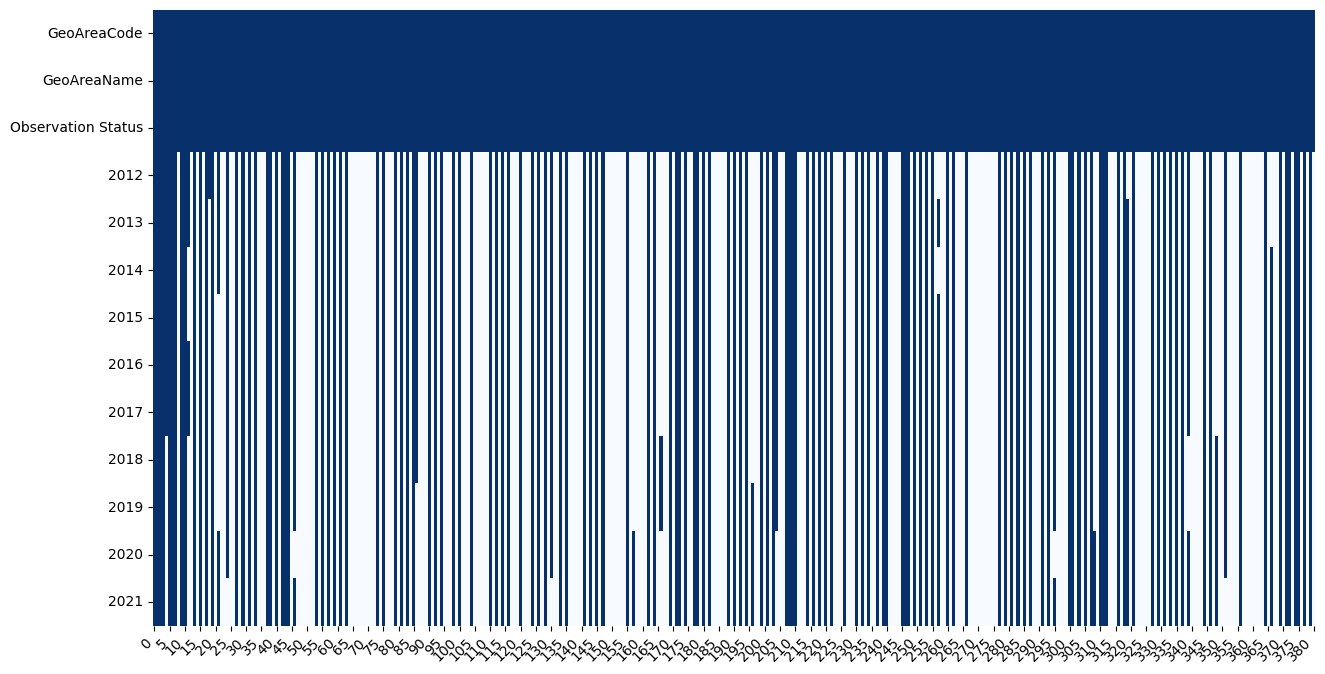

In [ ]:
plot_missing_value(dataframe)

In [ ]:
from jcopml.plot import plot_missing_value

In [ ]:
pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=aa3cbfc094e836462df63ffdeb50a813e9e9bcec7e8c10ed28c322d4f784f5d7
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built jcopml


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 379
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   GeoAreaCode         135 non-null    int64 
 1   GeoAreaName         135 non-null    object
 2   Observation Status  135 non-null    object
 3   2012                135 non-null    object
 4   2013                135 non-null    object
 5   2014                135 non-null    object
 6   2015                135 non-null    object
 7   2016                135 non-null    object
 8   2017                135 non-null    object
 9   2018                135 non-null    object
 10  2019                135 non-null    object
 11  2020                135 non-null    object
 12  2021                135 non-null    object
dtypes: int64(1), object(12)
memory usage: 14.8+ KB


In [ ]:
# Menghapus satu nilai dalam kolom
nilai_yang_dihapus = 'O'
dataframe = dataframe[dataframe['Observation Status'] != nilai_yang_dihapus]

In [ ]:
import matplotlib.pyplot as plt

# Membuat line plot untuk kedua variabel
plt.plot(GeoAreaName, variabel_1, label='Variabel 1')

# Memberikan judul dan label sumbu pada plot
plt.title('Perubahan Variabel 1 dan Variabel 2 seiring Waktu')
plt.xlabel('Waktu')
plt.ylabel('Nilai')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

,GeoAreaCode,GeoAreaName,Observation Status,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4,Afghanistan,E,6.4,6.6,6.8,7.2,7.6,8.1,8.8,10.2,11.2,12
1,2,Africa,A,164.9,170.9,178.6,189.6,204.1,207.9,215.6,225.1,254.7,270.6
2,901,Africa (ILO),A,184.9,190.8,199.2,208.3,228.8,228,232.8,244.5,261.1,271.6
3,8,Albania,E,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
4,12,Algeria,E,1.2,1.1,1.1,1,1.1,1.1,NaN,NaN,NaN,NaN
5,19,Americas,A,34.2,33.3,31.4,32.9,38.1,36.6,37.9,36,42.2,45.5
6,24,Angola,E,3.3,3.3,3.4,3.8,4.2,4.4,4.8,5.7,6.7,7.4
7,32,Argentina,E,1.4,1.3,1.1,1.2,1.3,1.4,1.5,1.5,1.5,1.4
8,51,Armenia,Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,142,Asia,A,372.6,359.9,345.7,357.8,336,319.3,325.2,343.9,396.2,414.1


In [ ]:
dataframe.isna().sum()

GeoAreaCode            0
GeoAreaName            0
Observation Status     0
2012                  77
2013                  76
2014                  77
2015                  77
2016                  76
2017                  76
2018                  77
2019                  77
2020                  77
2021                  78
dtype: int64

In [ ]:
df.head()

,GeoAreaCode,GeoAreaName,Observation Status,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4,Afghanistan,E,21,20.8,20.7,21.3,21.8,22.7,24,26.9,28.8,30.1
1,8,Albania,E,4.5,4.4,4.4,4.3,4.2,4.2,4.1,4.1,4.1,4.1
2,12,Algeria,E,3.1,2.9,2.7,2.6,2.6,2.6,<2.5,<2.5,<2.5,<2.5
3,24,Angola,E,13.3,12.7,12.5,13.5,14.4,14.7,15.2,17.5,20.1,21.6
4,32,Argentina,E,3.3,3,2.7,2.7,2.9,3.3,3.4,3.4,3.3,3.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Mengambil kolom negara dan kolom tahun 2012-2022
kolom_negara = df['GeoAreaName']
kolom_tahun = df.loc[:, '2012':'2021']  # Ganti "2012" dan "2022" dengan range tahun yang Anda inginkan

# Menghitung nilai terbesar dan terkecil untuk setiap negara
nilai_terbesar = kolom_tahun.max(axis=1)
nilai_terkecil = kolom_tahun.min(axis=1)

# Mencari indeks baris dengan nilai terbesar dan terkecil
indeks_terbesar = nilai_terbesar.idxmax()
indeks_terkecil = nilai_terkecil.idxmin()

# Mencari negara dengan nilai terbesar dan terkecil
negara_terbesar = kolom_negara.loc[indeks_terbesar]
negara_terkecil = kolom_negara.loc[indeks_terkecil]

print("Negara dengan nilai terbesar:", negara_terbesar)
print("Negara dengan nilai terkecil:", negara_terkecil)

<ipython-input-17-ae38a230588c>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nilai_terbesar = kolom_tahun.max(axis=1)
<ipython-input-17-ae38a230588c>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nilai_terkecil = kolom_tahun.min(axis=1)


KeyError: ignored

In [ ]:
pd.set_option('display.max_rows', None)
kolom_tahun

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,21,20.8,20.7,21.3,21.8,22.7,24,26.9,28.8,30.1
1,4.5,4.4,4.4,4.3,4.2,4.2,4.1,4.1,4.1,4.1
2,3.1,2.9,2.7,2.6,2.6,2.6,<2.5,<2.5,<2.5,<2.5
3,13.3,12.7,12.5,13.5,14.4,14.7,15.2,17.5,20.1,21.6
4,3.3,3,2.7,2.7,2.9,3.3,3.4,3.4,3.3,3.2
5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5
6,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5
7,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5
8,15.8,15.6,14.8,14.8,14.3,13.6,12.7,11.8,11.7,11.2
9,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5,<2.5


In [ ]:
kolom_negara.value_counts

<bound method IndexOpsMixin.value_counts of 0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                                 Angola
4                                              Argentina
5                                                Armenia
6                                                Austria
7                                             Azerbaijan
8                                             Bangladesh
9                                                Belarus
10                                               Belgium
11                                                 Benin
12                      Bolivia (Plurinational State of)
13                                Bosnia and Herzegovina
14                                              Botswana
15                                              Bulgaria
16                                          

In [ ]:
df

,GeoAreaCode,GeoAreaName,Observation Status,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4,Afghanistan,E,21,20.8,20.7,21.3,21.8,22.7,24,26.9,28.8,30.1
1,8,Albania,E,4.5,4.4,4.4,4.3,4.2,4.2,4.1,4.1,4.1,4.1
2,12,Algeria,E,3.1,2.9,2.7,2.6,2.6,2.6,2.0,2.0,2.0,2.0
3,24,Angola,E,13.3,12.7,12.5,13.5,14.4,14.7,15.2,17.5,20.1,21.6
4,32,Argentina,E,3.3,3,2.7,2.7,2.9,3.3,3.4,3.4,3.3,3.2
5,51,Armenia,E,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6,40,Austria,E,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
7,31,Azerbaijan,E,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,50,Bangladesh,E,15.8,15.6,14.8,14.8,14.3,13.6,12.7,11.8,11.7,11.2
9,112,Belarus,E,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
df.head()

,GeoAreaCode,GeoAreaName,Observation Status,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,4,Afghanistan,E,21.0,20.8,20.7,21.3,21.8,22.7,24.0,26.9,28.8,30.1
1,8,Albania,E,4.5,4.4,4.4,4.3,4.2,4.2,4.1,4.1,4.1,4.1
2,12,Algeria,E,3.1,2.9,2.7,2.6,2.6,2.6,2.0,2.0,2.0,2.0
3,24,Angola,E,13.3,12.7,12.5,13.5,14.4,14.7,15.2,17.5,20.1,21.6
4,32,Argentina,E,3.3,3.0,2.7,2.7,2.9,3.3,3.4,3.4,3.3,3.2


In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2012'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2012',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2013'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2013',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2014'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2014',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2015'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2015',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2016'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2016',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2017'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2017',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2018'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2018',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2019'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2019',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2020'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2020',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
import plotly.graph_objects as go

# Membuat trace
trace = go.Scatter(
    x=df.index,
    y=df['2021'],
    mode='lines+markers',
    text=df['GeoAreaName'],
    hovertemplate='Negara: %{text}<br>Nilai: %{y}<extra></extra>'
)

# Membuat layout
layout = go.Layout(
    title='Line Chart Tahun 2021',
    xaxis=dict(
        tickangle=90,
        ticktext=df['GeoAreaName'],
        tickvals=df.index
    ),
    yaxis=dict(
        title='Nilai'
    )
)

# Membuat figure
fig = go.Figure(data=[trace], layout=layout)

# Menampilkan figure
fig.show()

In [ ]:
df.loc[df['GeoAreaName'] == 'South Sudan']

,GeoAreaCode,GeoAreaName,Observation Status,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
117,728,South Sudan,E,728.0,728.0,728.0,728.0,728.0,728.0,728.0,728.0,20.8,21.4
118,728,South Sudan,O,728.0,728.0,728.0,728.0,728.0,728.0,728.0,728.0,728.0,728.0
